In [1]:
import autorootcwd
import os
import json
import pandas as pd

In [2]:
DIR = 'results/hop_lengths'
experiments = os.listdir(DIR)

rows = []
errored = []

for experiment in experiments:
    # Format of filename is lr-search_scheduler_lr
    hop_length = int(experiment.split('_')[2])
    try:
        with open(f'{DIR}/{experiment}/val_metrics.json') as f:
            data = json.load(f)
        rows.append({
            'hop_length': hop_length,
            'accuracy': data['mean']['song_wise_acc'],
            'root': data['mean']['root'],
            'majmin': data['mean']['majmin'],
            'third': data['mean']['third'],
            'seventh': data['mean']['seventh'],
            'mirex': data['mean']['mirex'],
            'class_wise_acc_mean': data['class_wise_acc_mean'],
            'class_wise_acc_median': data['class_wise_acc_median'],
        })
    except:
        errored.append(experiment)

df = pd.DataFrame(rows)

In [3]:
df.sort_values('hop_length', ascending=True, inplace=True)
df

,hop_length,accuracy,root,majmin,third,seventh,mirex,class_wise_acc_mean,class_wise_acc_median
1,512,0.596018,0.782960,0.752490,0.745723,0.618190,0.795364,0.192093,0.020951
2,1024,0.595325,0.781060,0.752802,0.745483,0.617698,0.792313,0.193836,0.021484
4,2048,0.590625,0.778756,0.750582,0.743372,0.612871,0.791404,0.176847,0.000000
0,4096,0.593483,0.783439,0.751754,0.745394,0.615718,0.791787,0.180654,0.005402
5,8192,0.559478,0.749674,0.712638,0.706321,0.580633,0.807861,0.173526,0.009317
3,16384,0.551547,0.740399,0.705044,0.697979,0.571941,0.774712,0.152071,0.000000


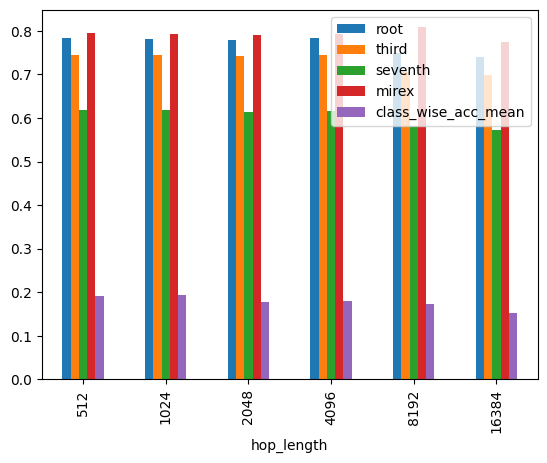

In [4]:
# Plot hop length vs root, third, seventh, mirex and class_wice_acc_mean on the same plot as a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x='hop_length', y=['root', 'third', 'seventh', 'mirex', 'class_wise_acc_mean'], kind='bar', ax=ax)

plt.show()

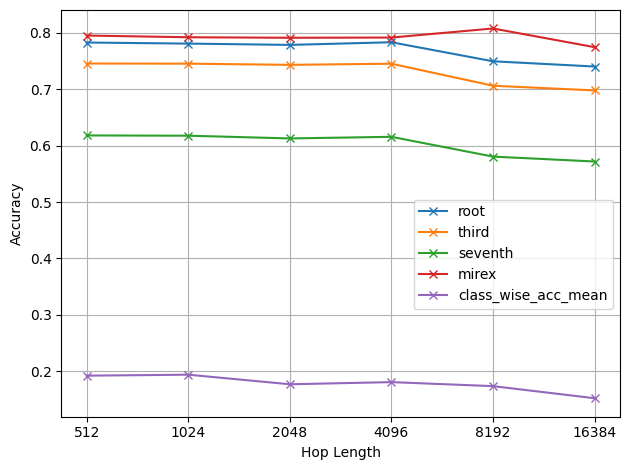

In [5]:
# Plot hop length vs root, third, seventh, mirex and class_wice_acc_mean on the same plot as a line chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x='hop_length', y=['root', 'third', 'seventh', 'mirex', 'class_wise_acc_mean'], kind='line', ax=ax, marker='x')

# Set y-axis to log base 2


# Set xticks to be the hop lengths
plt.xscale('log', base=2)
plt.xticks(df['hop_length'])
ax.xaxis.set_major_formatter(plt.ScalarFormatter())

ax.set_xlabel('Hop Length')
ax.set_ylabel('Accuracy')

# Grid lines
plt.grid(True)

# Set legend location
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.4))
plt.tight_layout()
plt.savefig('report/figures/hop_length_vs_accuracy.png', dpi=100, bbox_inches='tight')

plt.show()